# Edge properties
## Introduction
In this tutorial we cover understanding the properties of edges (that is, synapses and junctions).

## Preamble
The code in this section is similar to the code in sections "Introduction" and "Loading" from the previous tutorial, but applied to edges. It assumes that you have already downloaded the circuit. If not, take a look to the notebook **01_circuits** (Downloading a circuit).

In [1]:
import bluepysnap
import matplotlib.pyplot as plt
%matplotlib inline

# load the circuit and store the node population
circuit_path = "sonata/circuit_sonata.json"
circuit = bluepysnap.Circuit(circuit_path)

## Properties and methods

### Getting properties from all populations
Working with the output of `circuit.edges.get` follows the principles of that of `circuit.nodes.get` and won't be covered here. Please have a look at the previous notebook `03_node_properties.ipynb`.

### Working with edge population objects


Edge populations provide information about the collection of edges, and what information is available for each of the edges themselves.

Let's start by grabbing a population and printing out its available properties:

In [2]:
# we can also find other edge names with "circuit.edges.population_names"
edge_population = circuit.edges["thalamus_neurons__thalamus_neurons__chemical"]
edge_population.property_names

{'@source_node',
 '@target_node',
 'afferent_center_x',
 'afferent_center_y',
 'afferent_center_z',
 'afferent_section_id',
 'afferent_section_pos',
 'afferent_section_type',
 'afferent_segment_id',
 'afferent_segment_offset',
 'afferent_surface_x',
 'afferent_surface_y',
 'afferent_surface_z',
 'conductance',
 'decay_time',
 'delay',
 'depression_time',
 'efferent_center_x',
 'efferent_center_y',
 'efferent_center_z',
 'efferent_section_id',
 'efferent_section_pos',
 'efferent_section_type',
 'efferent_segment_id',
 'efferent_segment_offset',
 'efferent_surface_x',
 'efferent_surface_y',
 'efferent_surface_z',
 'facilitation_time',
 'n_rrp_vesicles',
 'spine_length',
 'syn_type_id',
 'synapse_type_id',
 'u_syn'}

Also, there are additional object level properties. For example, the edge population `name` and `size` (that is, the number of nodes it contains) can be retrieved with:

In [3]:
print("Name:", edge_population.name)
print("Population size:", edge_population.size)

Name: thalamus_neurons__thalamus_neurons__chemical
Population size: 44178280


We can query the edges between sections of nodes with specific m-types, and retrieve their properties:

In [4]:
post= {'mtype': 'VPL_TC', 'region': 'mc2;VPL'}
pre = {'mtype': 'Rt_RC', 'region': 'mc2;Rt'}

synapses = edge_population.pathway_edges(
    source=pre, target=post, properties=['@source_node', '@target_node', 'u_syn'])

This allows us to then visualize the distribution of the number of connections:

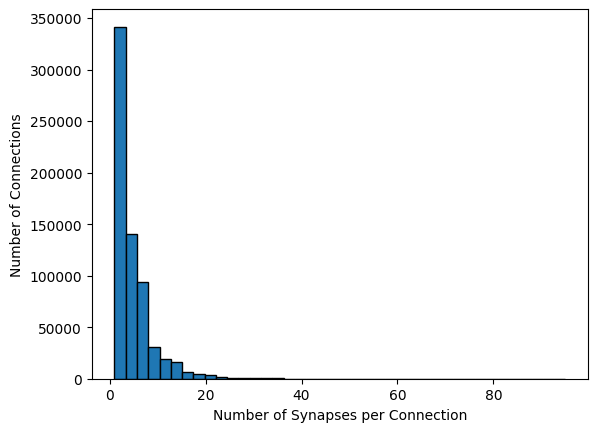

In [5]:
df = synapses.groupby(['@source_node', '@target_node']).size()
ax = df.hist(bins=40,edgecolor='black', grid=False)
ax.set_xlabel('Number of Synapses per Connection')
ax.set_ylabel('Number of Connections');

Or, alternatively, the distribution of other properties of the edges:

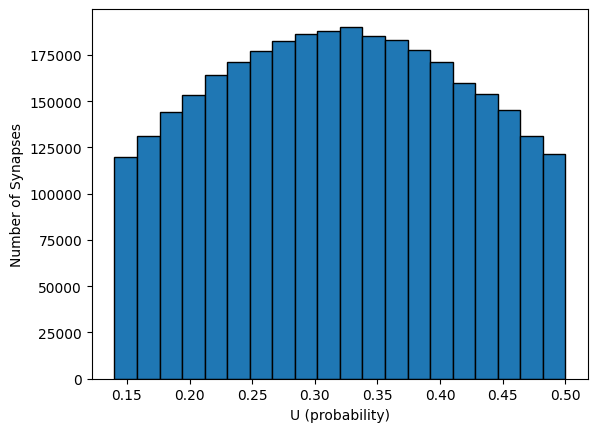

In [6]:
df = synapses.u_syn
ax = df.hist(bins=20, edgecolor='black', grid=False)
ax.set_xlabel('U (probability)')
ax.set_ylabel('Number of Synapses');

## Conclusion
Now that we can retrieve edge properties, we have covered the main tasks of inspecting the static components of a SONATA circuit.